## Introduction:

This notebook is devoted to implement Q learning algorithm on Left_Right problem .. a case study in Batch Learning paper (Page 14) .. 

Paper Link ==> http://www.jmlr.org/papers/v6/ernst05a.html

Guided by this tutorial ==> http://mnemstudio.org/path-finding-q-learning-tutorial.htm

and also this one ==> https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0


## Experimental Setup:

num of simulations = 100,000

s = rand(0, 10)     selected at random 

a = [-2, 2] ==> -2: left, 2: right

r = [100, 0, 50] ==> 0: inside the interval, 50: left, 100: right

num of episods = 300 

In [90]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
import tensorflow as tf
import pandas as pd
%matplotlib inline

## Variables Decleration: 

__Episods:

We'll call each exploration an episode.  
Each episode consists of the agent moving from the initial state to the goal state.  
Each time the agent arrives at the goal state, the program goes to the next episode.
hence, the episod is treated as if it's the number of runs! (Each episode is equivalent to one training session)


In [93]:
## num episods
num_episod = 300

gamma = 0.9 
alpha = 0.3

## input Tuple
state = np.random.randint(0, 0 + 11 , size=10) # create array from 1 to 10 randomly 
s_next = np.random.randint(0, 0 + 11 , size=10) # create array from 1 to 10 randomly 
action = np.random.choice([0, 1], state.shape[0]) # to be able to access Q indices .. left = 0, right = 1 instead of -2, 2

Curr_state_current_action = np.column_stack((state, action))

reward = [np.random.choice([50], state.shape[0]), np.random.choice([100], state.shape[0])]  # reward is a matrix
reward = np.transpose(reward)
## best action .. 
best_action = []

## Q_table
Q = np.zeros_like(reward)
Q

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

## ___________________ 1. Basic Q Model  ___________________

In [94]:
for i in range(num_episod):
    current_state = np.random.choice(state) #select random state 
    if current_state == 10:
        break
    else:
        current_action = np.random.choice(action)
        next_state = np.random.choice(s_next) #consider moving to the next state
        Q[current_state, current_action] = reward[current_state, current_action] + gamma*np.max(Q[next_state, :])
        current_state = next_state
    best_action.append(action)  ## best actions

print Q

[[  0   0]
 [ 95   0]
 [  0   0]
 [  0   0]
 [ 50 100]
 [  0   0]
 [  0   0]
 [  0   0]
 [ 95   0]
 [  0   0]]


Text(0,0.5,u'action')

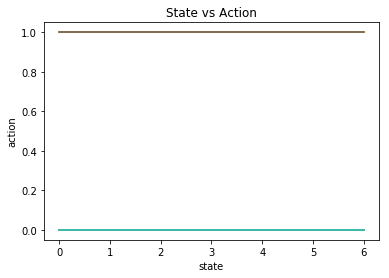

In [95]:
plt.plot(best_action)
plt.title('State vs Action')
plt.xlabel('state')
plt.ylabel('action')  #actions are either 0 (left) or 1 (right)

In [96]:
Q

array([[  0,   0],
       [ 95,   0],
       [  0,   0],
       [  0,   0],
       [ 50, 100],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [ 95,   0],
       [  0,   0]])

## Avg. Q and plotting it: 

To be able to compare the performance in every set of episods .. 
let's calculate the mean over the total of 300 episods !

In [97]:
np.mean(Q)

17.0

Let's plot the Q value over each state and its corresponding action .. 

every color represents different possible action 

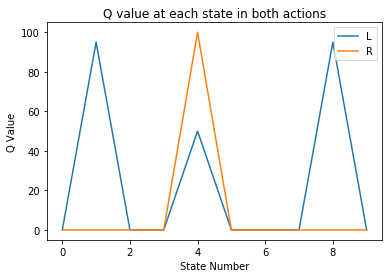

In [98]:
plt.plot(Q)
plt.title('Q value at each state in both actions')
plt.xlabel("State Number")
plt.ylabel("Q Value")
plt.legend('LR')

## Comment:
the figure above demonestares the best action to be taken at each state and the corresponding Q value .. 

i.e. at state 0 going left or right will give u the same long term reward of zero .. 
starting from state 1 .. it's better to go left to get a reward of 100 and going right will give you a reward of zero .. 

at state # 8, it's better to go left to obtain higher reward of 100 .. instead of only zero by going right .. 